In [76]:
import numpy as np
import pandas as pd
import os
import librosa
import wave
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

import keras 
from tensorflow.keras.layers import *
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.models import *
from keras.optimizers import RMSprop

In [77]:
def extract_mfcc(wav_file_name):
    # input : path_to_wav_file
    # output : mfcc_features
    y, sr = librosa.load(wav_file_name)
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc= 40).T, axis=0)
    
    return mfccs

In [78]:
ravedess_speech_labels = []
ravedess_speech_data = []
for dirname, _, filenames in os.walk('C:\\Users\\swami\\Desktop\\pro2\\dataset'):
    for filename in filenames:
        ravedess_speech_labels.append(int(filename[7:8]) - 1)
        wav_file_name = os.path.join(dirname,filename)
        ravedess_speech_data.append(extract_mfcc(wav_file_name))
        
print("Finished loading the dataset")

Finished loading the dataset


In [79]:
# ravedess_speech_labels = []
# ravedess_speech_data = []
# for dirname, _, filenames in os.walk('C:\\Users\\swami\\Desktop\\pro2\\happy'):
#     for filename in filenames:
#         ravedess_speech_labels.append(int(filename[7:8]) - 1)
#         wav_file_name = os.path.join(dirname,filename)
#         ravedess_speech_data.append(extract_mfcc(wav_file_name))
        
# print("Finished loading the dataset")

In [80]:
ravedess_speech_data

[array([-6.9779260e+02,  5.4890041e+01,  6.6346550e-01,  1.2435786e+01,
         7.7339516e+00,  5.3075010e-01, -3.2166309e+00, -3.1593943e+00,
        -1.0977551e+01, -2.8487110e+00,  8.1529737e-01, -3.0370669e+00,
         1.9554467e+00, -3.7356679e+00,  4.3770033e-01,  7.8235656e-01,
        -4.0714283e+00, -1.8607763e+00, -1.3236902e+00, -9.2046332e-01,
        -5.9476104e+00, -5.0543833e-01, -2.3373914e+00, -4.5227795e+00,
        -1.6797227e+00, -8.1932092e-01, -4.8584828e+00,  2.5533602e-01,
        -2.1487041e+00,  1.4505519e-01, -2.0357563e+00, -2.1196339e+00,
        -2.7125893e+00, -1.8361270e+00, -3.2048051e+00, -1.5453686e+00,
        -1.0909370e+00, -1.7701062e+00, -3.5011320e+00, -1.5380875e+00],
       dtype=float32),
 array([-6.9285577e+02,  5.5363899e+01, -1.5483193e+00,  1.6038305e+01,
         8.8188105e+00, -1.4658636e-01, -1.3733920e+00, -5.2931800e+00,
        -1.1623183e+01, -1.3482835e+00,  8.4371454e-01, -2.6412783e+00,
         1.0172498e+00, -3.2715344e+00, 

In [81]:
ravedess_speech_data_array = np.asarray(ravedess_speech_data)
ravedess_speech_label_array = np.array(ravedess_speech_labels)
ravedess_speech_label_array.shape

labels_categorical = to_categorical(ravedess_speech_label_array)
labels_categorical.shape


(5760, 8)

<AxesSubplot:ylabel='count'>

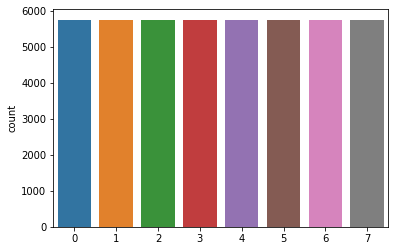

In [82]:
import seaborn as sns
sns.countplot(labels_categorical)

In [83]:
import librosa.display
from IPython.display import Audio

import warnings
warnings.filterwarnings('ignore')

def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

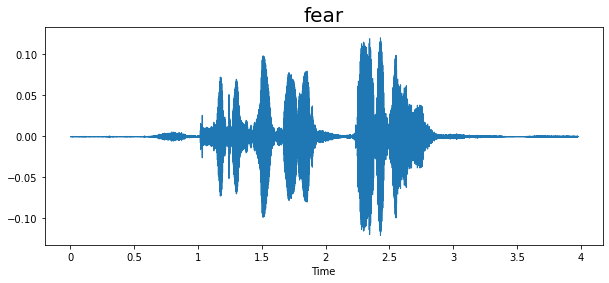

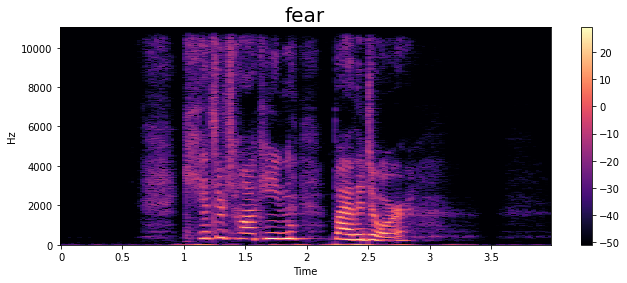

In [84]:
emotion = 'fear'
# path = np.array(df['speech'][df['label']==emotion])
path = "C:\\Users\\swami\\Desktop\\pro2\\fear\\fear008.wav"
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

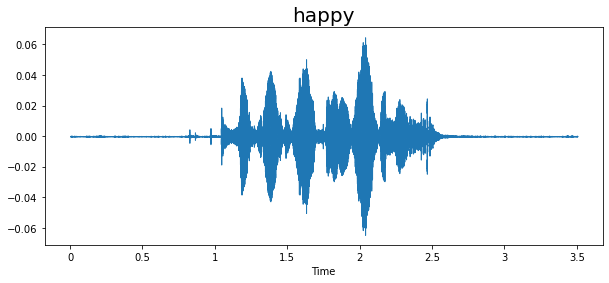

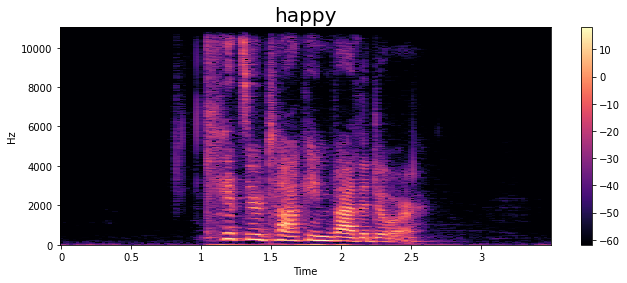

In [85]:
emotion = 'happy'
# path = np.array(df['speech'][df['label']==emotion])
path = "C:\\Users\\swami\\Desktop\\pro2\\happy\\happy008.wav"
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

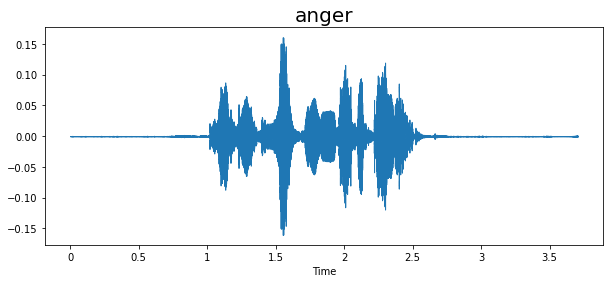

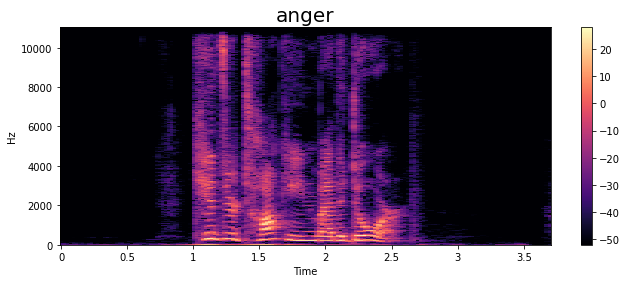

In [86]:
emotion = 'anger'
# path = np.array(df['speech'][df['label']==emotion])
path = "C:\\Users\\swami\\Desktop\\pro2\\anger\\anger008.wav"
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

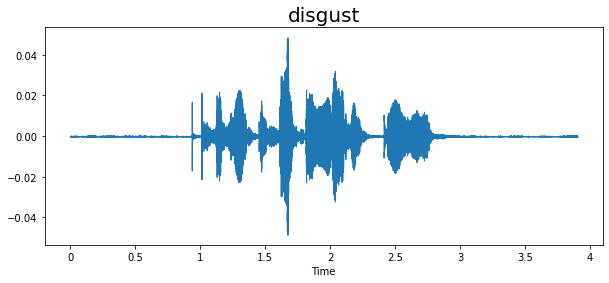

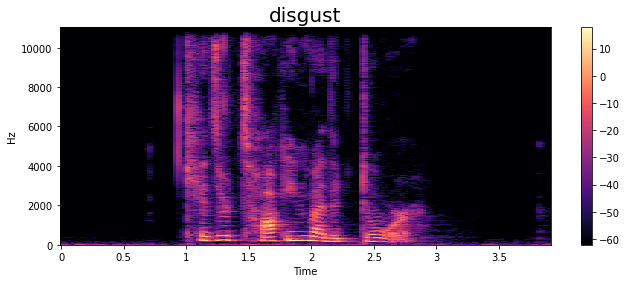

In [87]:
emotion = 'disgust'
# path = np.array(df['speech'][df['label']==emotion])
path = "C:\\Users\\swami\\Desktop\\pro2\\disgust\\disgust008.wav"
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

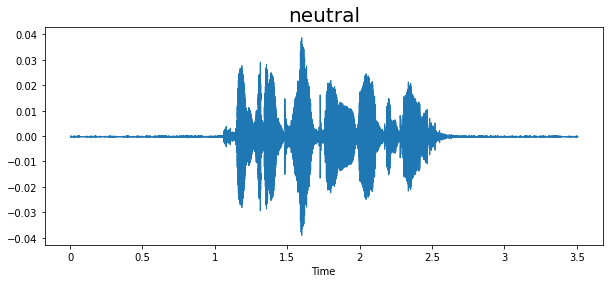

In [88]:
emotion = 'neutral'
# path = np.array(df['speech'][df['label']==emotion])
path = "C:\\Users\\swami\\Desktop\\pro2\\neutral\\neutral008.wav"
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

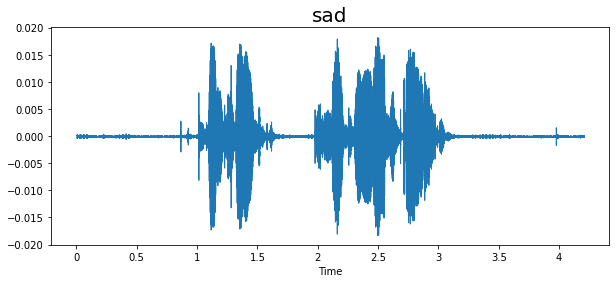

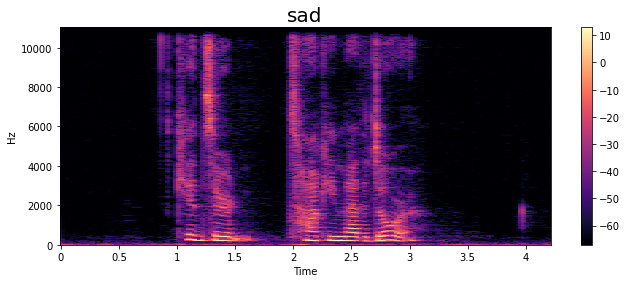

In [89]:
emotion = 'sad'
# path = np.array(df['speech'][df['label']==emotion])
path = "C:\\Users\\swami\\Desktop\\pro2\\sad\\sad008.wav"
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

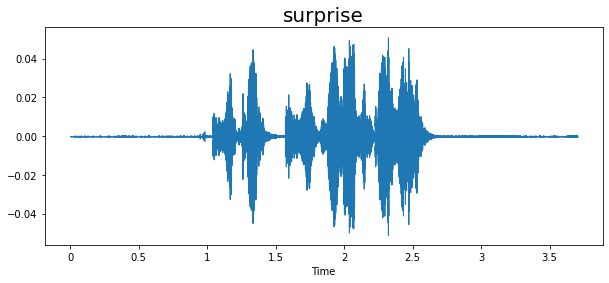

In [90]:
emotion = 'surprise'
# path = np.array(df['speech'][df['label']==emotion])
path = "C:\\Users\\swami\\Desktop\\pro2\\surprise\\surprise008.wav"
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [91]:
ravedess_speech_data_array.shape

(5760, 40)

In [92]:
x_train,x_test,y_train,y_test = train_test_split(np.array(ravedess_speech_data_array),labels_categorical, test_size=0.20, random_state=42)

In [93]:
number_of_samples = ravedess_speech_data_array.shape[0]
training_samples = int(number_of_samples * 0.8)
validation_samples = int(number_of_samples * 0.1)
test_samples = int(number_of_samples * 0.1)



number_of_samples

5760

In [94]:
training_samples

4608

In [95]:
validation_samples

576

In [96]:

test_samples

576

In [97]:
# df = pd.DataFrame()
# df['speech'] = ravedess_speech_data
# df['label'] = ravedess_speech_labels
# df.head()

In [98]:
def create_model_LSTM():
    model = Sequential()
    model.add(LSTM(128, return_sequences = False, input_shape = (40,1)))
    model.add(Dense(64))
    model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(32))
    model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(8))
    model.add(Activation('softmax'))
    
    
    model.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

In [99]:
w = np.expand_dims(ravedess_speech_data_array[:training_samples], -1)

In [100]:
w.shape

(4608, 40, 1)

In [101]:
model_A = create_model_LSTM()
history = model_A.fit(np.expand_dims(ravedess_speech_data_array[:training_samples], -1),labels_categorical[:training_samples], validation_data=(np.expand_dims(ravedess_speech_data_array[training_samples:training_samples+validation_samples], -1),labels_categorical[training_samples:training_samples + validation_samples]), epochs = 180, shuffle = True)

Epoch 1/180
144/144 [==============================] - 5s 23ms/step - loss: 2.0511 - accuracy: 0.1701 - val_loss: 1.9827 - val_accuracy: 0.2292
Epoch 2/180
144/144 [==============================] - 3s 21ms/step - loss: 1.9618 - accuracy: 0.2270 - val_loss: 1.8852 - val_accuracy: 0.3021
Epoch 3/180
144/144 [==============================] - 3s 21ms/step - loss: 1.8761 - accuracy: 0.2773 - val_loss: 1.8177 - val_accuracy: 0.3090
Epoch 4/180
144/144 [==============================] - 3s 21ms/step - loss: 1.8371 - accuracy: 0.2784 - val_loss: 1.7958 - val_accuracy: 0.3056
Epoch 5/180
144/144 [==============================] - 3s 21ms/step - loss: 1.8149 - accuracy: 0.2869 - val_loss: 1.7324 - val_accuracy: 0.3351
Epoch 6/180
144/144 [==============================] - 3s 20ms/step - loss: 1.7765 - accuracy: 0.3108 - val_loss: 1.7185 - val_accuracy: 0.3472
Epoch 7/180
144/144 [==============================] - 3s 21ms/step - loss: 1.7770 - accuracy: 0.3053 - val_loss: 1.7035 - val_accuracy:

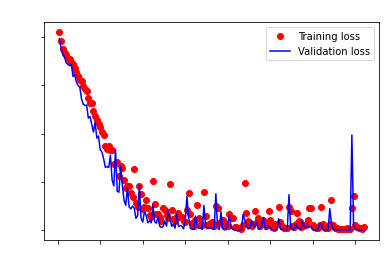

In [102]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss,'ro', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss', color = 'white')
plt.xlabel('Epochs', color = 'white')
plt.ylabel('Loss', color = 'white')
plt.yticks(color='white')
plt.xticks(color='white')




plt.legend()

plt.show()

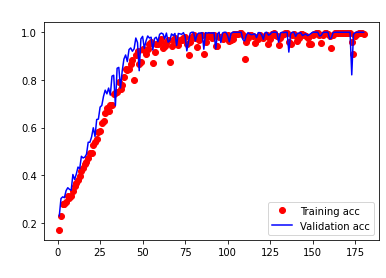

In [103]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']



plt.plot(epochs, acc,'ro', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy', color = 'white')
plt.xlabel('Epochs', color = 'white')
plt.ylabel('Accuracy', color = 'white')
plt.legend()

plt.show()

In [104]:
model_A.evaluate(np.expand_dims(ravedess_speech_data_array[training_samples + validation_samples:], -1), labels_categorical[training_samples + validation_samples:])

18/18 [==============================] - 0s 9ms/step - loss: 0.0042 - accuracy: 0.9983


[0.004209593869745731, 0.9982638955116272]

In [105]:
emotions = {1 : 'neutral', 2 : 'calm', 3 : 'happy', 4 : 'sad', 5 : 'angry', 6 : 'fearful', 7 : 'disgust', 8 : 'surpised'}
def predict(wav_filepath):
    test_point = extract_mfcc(wav_filepath)
    test_point=np.reshape(test_point,newshape=(1,40,1))
    predictions = model_A.predict(test_point)
    print(emotions[np.argmax(predictions[0]) + 1])

In [106]:
# model_A.fit(x_train,y_train)

In [107]:
predict('C:\\Users\\swami\\Desktop\\pro2\\dataset\\Actor_02\\03-01-01-01-02-02-02.wav')

1/1 [==============================] - 0s 343ms/step
neutral


In [108]:
predict('C:\\Users\\swami\\Desktop\\pro2\\dataset\\Actor_17\\03-01-08-01-02-01-17.wav')

1/1 [==============================] - 0s 22ms/step
surpised


In [109]:
predict('C:\\Users\\swami\\Desktop\\pro2\\dataset\\Actor_24\\03-01-01-01-01-01-24.wav')

1/1 [==============================] - 0s 23ms/step
neutral


In [110]:
predict('C:\\Users\\swami\\Desktop\\pro2\\happy007.wav')

1/1 [==============================] - 0s 28ms/step
happy


In [111]:
predict('C:\\Users\\swami\\Desktop\\pro2\\fear130.wav')

1/1 [==============================] - 0s 27ms/step
fearful


In [112]:
predict('C:\\Users\\swami\\Desktop\\pro2\\surprise008.wav')

1/1 [==============================] - 0s 34ms/step
surpised


In [113]:
predict('C:\\Users\\swami\\Desktop\\pro2\\anger\\anger011.wav')

1/1 [==============================] - 0s 23ms/step
angry


In [114]:
predict('C:\\Users\\swami\\Desktop\\pro2\\anger.wav')

1/1 [==============================] - 0s 24ms/step
sad


In [115]:
predict('C:\\Users\\swami\\Desktop\\pro2\\DrS1 (2).wav')

1/1 [==============================] - 0s 29ms/step
calm


In [116]:
predict('C:\\Users\\swami\\Desktop\\pro2\\neutral.wav')

1/1 [==============================] - 0s 33ms/step
happy


In [117]:
predict('C:\\Users\\swami\\Desktop\\pro2\\happyneutral.wav')

1/1 [==============================] - 0s 27ms/step
neutral


In [118]:
# emotion = 'hello'
# # path = np.array(df['speech'][df['label']==emotion])
# path = "C:\\Users\\swami\\Desktop\\pro2\\hello.wav"
# data, sampling_rate = librosa.load(path)
# waveplot(data, sampling_rate, emotion)
# spectogram(data, sampling_rate, emotion)
# Audio(path)

In [119]:
predict('C:\\Users\\swami\\Desktop\\pro2\\DS1.wav')

1/1 [==============================] - 0s 28ms/step
calm


In [120]:
predict('C:\\Users\\swami\\Desktop\\pro2\\sad.wav')

1/1 [==============================] - 0s 28ms/step
sad


In [121]:
predict('C:\\Users\\swami\\Desktop\\pro2\\hello.wav')

1/1 [==============================] - 0s 26ms/step
disgust


In [122]:
predict('C:\\Users\\swami\\Desktop\\pro2\\sad1.wav')

1/1 [==============================] - 0s 25ms/step
sad


In [123]:
predict('C:\\Users\\swami\\Desktop\\pro2\\test.wav')

1/1 [==============================] - 0s 30ms/step
surpised


In [124]:
model_A.save('mymodel.h5')